
IMDb Dataset Sample:
Review 1 : the as you with out themselves powerful lets loves their becomes reaching had journalist of lot from anyone to have after out atmosphere never more room and it so heart shows to years of every never going and help moments or of every chest visual movie except her was several of enough more with is now current film as you of mine potentially unfortunately of you than him that with out themselves her get for was camp of you movie sometimes movie that with scary but and to story wonderful that in seeing in character to of 70s musicians with heart had shadows they of here that with her serious to have does when from why what have critics they is you that isn't one will very to as itself with other and in of seen over landed for anyone of and br show's to whether from than out themselves history he name half some br of and odd was two most of mean for 1 any an boat she he should is thought frog but of script you not while history he heart to real at barrel b

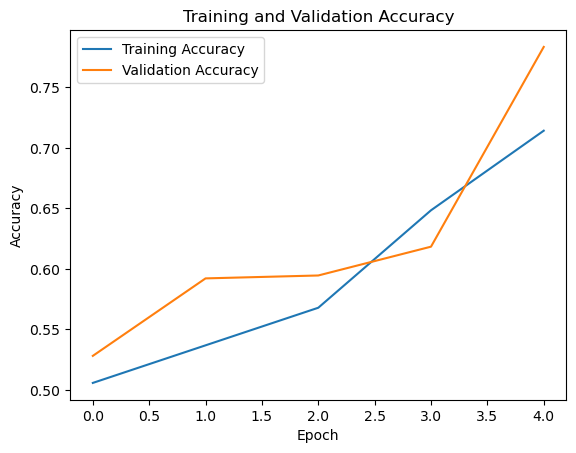

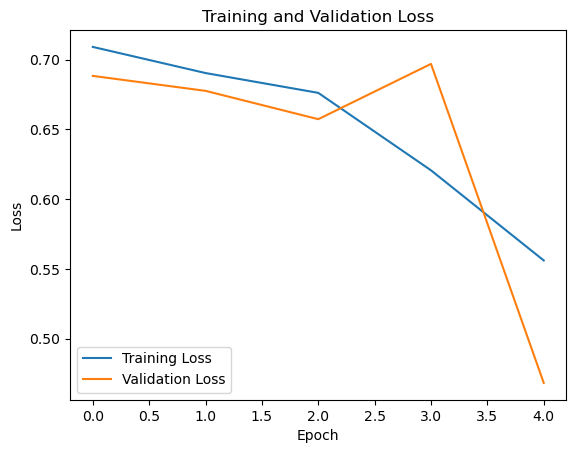

In [1]:
#Lab 8 
import numpy as np
import tensorflow as tf

from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, SimpleRNN

# Load IMDb dataset
max_features = 10000
maxlen = 200  # Cut reviews after 200 words

# Load the IMDb dataset with original words
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

# Get the word index mapping
word_index = imdb.get_word_index()

# Invert the word index mapping to map indices to words
index_to_word = {idx: word for word, idx in word_index.items()}


print("IMDb Dataset Sample:")

for i in range(5):   # Print the first 5 samples
    words = [index_to_word.get(idx, '?') for idx in x_train[i]]
    review_text = ' '.join(words)

    # Print the review text and sentiment label
    print("Review", i + 1, ":", review_text)
    print("Sentiment:", y_train[i])
    print()
    
# Pad sequences
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

# Build RNN model
embedding_dim = 50

model = Sequential()
model.add(Embedding(input_dim=max_features,
                    output_dim=embedding_dim,
                    input_length=maxlen))

model.add(SimpleRNN(units=64,
                    dropout=0.2,
                    recurrent_dropout=0.2))

model.add(Dense(units=1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train model
history = model.fit(
    x_train,
    y_train,
    epochs=5,
    batch_size=128,
    validation_split=0.2
)

loss, accuracy = model.evaluate(x_test, y_test)
print('Test accuracy:', accuracy)

loss, accuracy = model.evaluate(x_test, y_test)
print('Test accuracy:', accuracy)

# Test with new data
def predict_sentiment(text):
    # Tokenize and pad the input text
    word_to_index = imdb.get_word_index()
    
    words = text.lower().split()
    
    # Map words to indices (use 8 as OOV / unknown token like you tried)
    sequence = [
        word_to_index[word] if word in word_to_index and word_to_index[word] < max_features
        else 8
        for word in words
    ]
    
    # Pad to the same length used for training
    sequence = pad_sequences([sequence], maxlen=maxlen)
    
    # Predict sentiment
    prediction = model.predict(sequence)[0][0]
    return prediction


# Example usage
positive_text = "This movie was fantastic, I loved every moment of it!"

negative_text = "I couldn't stand this movie, it was terrible."
print("Positive text sentiment:", predict_sentiment(positive_text)) 
print("Negative text sentiment:", predict_sentiment(negative_text))

import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Training and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()